# Advanced Operations of Quantum Circuit

[![Download Notebook](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_notebook_en.svg)](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/master/mindquantum/en/beginner/mindspore_advanced_operations_of_quantum_circuit.ipynb)&emsp;
[![Download Code](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_download_code_en.svg)](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/master/mindquantum/en/beginner/mindspore_advanced_operations_of_quantum_circuit.py)&emsp;
[![View Source On Gitee](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_source_en.svg)](https://gitee.com/mindspore/docs/blob/master/docs/mindquantum/docs/source_en/beginner/advanced_operations_of_quantum_circuit.ipynb)

In previous tutorial we introduced the basic usage of [quantum circuit](https://mindspore.cn/mindquantum/docs/en/master/beginner/parameterized_quantum_circuit.html#quantum-circuit). In this tutorial, we will introduce how to operator the circuit in high level.

## [mindquantum.core.circuit.controlled](https://www.mindspore.cn/mindquantum/docs/en/master/core/circuit/mindquantum.core.circuit.controlled.html)

The [controlled](https://www.mindspore.cn/mindquantum/docs/en/master/core/circuit/mindquantum.core.circuit.controlled.html) method is used to add control qubits (which can be multiple) to any quantum circuit or quantum operator.

For example, let's build a quantum circuit containing only two qubits and add a control qubit - $q_2$ to it by a [controlled](https://www.mindspore.cn/mindquantum/docs/en/master/core/circuit/mindquantum.core.circuit.controlled.html) method:

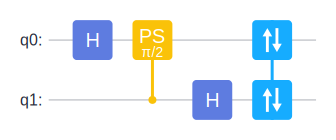

In [1]:
from mindquantum.algorithm.library import qft
from mindquantum.core.circuit import controlled

u1 = qft(range(2))  # Build the quantum circuit
u1.svg()

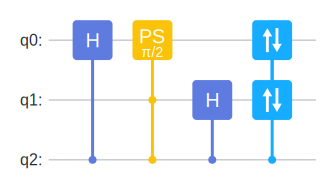

In [2]:
u2 = controlled(u1)(2)  # Add control qubit q2 to the circuit, returning a new circuit
u2.svg()

Actually, [controlled()](https://www.mindspore.cn/mindquantum/docs/en/master/core/circuit/mindquantum.core.circuit.controlled.html) returns a function. E.g:

In [3]:
u3 = controlled(u1)

We can add control qubits to the initial circuit u1 by calling u3, which has the same effect as above:

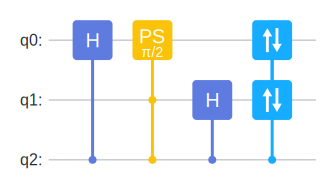

In [4]:
u4 = u3(2)
u4.svg()

Note: The added control qubit cannot be the target qubit of a gate that already exists in the circuit, otherwise an error will be reported!

In addition, we can batch add control qubits to the quantum circuit. For example, in the following example we add control qubits - $q_2$ and $q_3$ to $q_0$ and $q_1$ respectively:

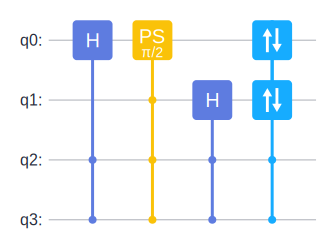

In [5]:
u = controlled(qft)
u = u([2, 3], [0, 1])  # Bulk add control qubits
u.svg()

## [mindquantum.core.circuit.dagger](https://www.mindspore.cn/mindquantum/docs/en/master/core/circuit/mindquantum.core.circuit.dagger.html)

The [dagger](https://www.mindspore.cn/mindquantum/docs/en/master/core/circuit/mindquantum.core.circuit.dagger.html) method is used to find the Hermitian conjugates of quantum circuits or quantum operators.

The following examples provide two ways of doing dagger operations:

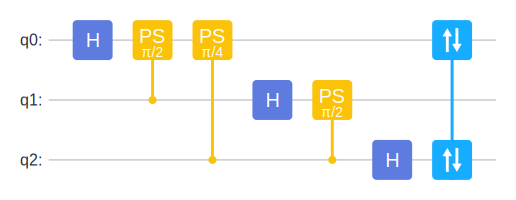

In [6]:
from mindquantum.core.circuit import dagger

u1 = qft(range(3))
u1.svg()

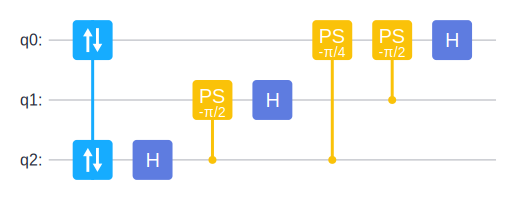

In [7]:
u2 = dagger(u1)
u2.svg()

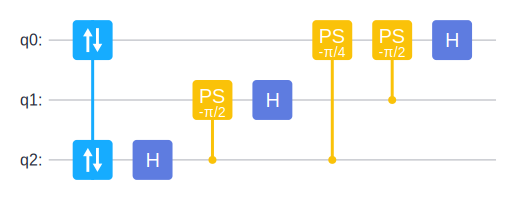

In [8]:
u3 = dagger(qft)
u4 = u3(range(3))
u4.svg()

It can be seen that the circuits obtained by the two methods are the same.

## [mindquantum.core.circuit.apply](https://www.mindspore.cn/mindquantum/docs/en/master/core/circuit/mindquantum.core.circuit.apply.html)

The [apply](https://www.mindspore.cn/mindquantum/docs/en/master/core/circuit/mindquantum.core.circuit.apply.html) method is used to apply a quantum circuit or quantum operator to the specified qubits (which can be multiple).

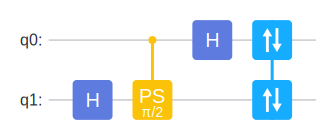

In [9]:
from mindquantum.core.circuit import apply

u1 = qft([0, 1])
circuit1 = apply(u1, [1, 0])  # Apply quantum circuit u1 to qubits q1, q0
circuit1.svg()

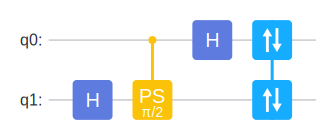

In [10]:
u2 = apply(qft, [1, 0])  # Apply qft to qubits q0, q1
circuit2 = u2([0, 1])
circuit2.svg()

## [mindquantum.core.circuit.add_prefix](https://www.mindspore.cn/mindquantum/docs/en/master/core/circuit/mindquantum.core.circuit.add_prefix.html)

The [add_prefix](https://www.mindspore.cn/mindquantum/docs/en/master/core/circuit/mindquantum.core.circuit.add_prefix.html) method is used to prefix the parameter names of parameterized quantum circuits or parameterized quantum operators. This is useful in neural network layering, for example:

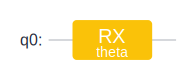

In [11]:
from mindquantum.core.circuit import add_prefix, Circuit
from mindquantum.core.gates import RX, H

circ = Circuit().rx("theta", 0)
circ.svg()

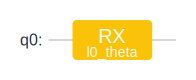

In [12]:
# After adding, the parameter "theta" becomes "l0_theta"
circ = add_prefix(circ, 'l0')
circ.svg()

We can prefix the parameter name of a parameterized qubit after it acts on a specific qubit, or we can add it when it has not yet been applied to the qubit. E.g:

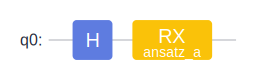

In [13]:
u = lambda qubit: Circuit([H.on(0), RX('a').on(qubit)])

u1 = u(0)
u1 = add_prefix(u1, 'ansatz')
u1.svg()

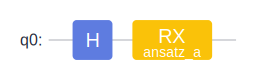

In [14]:

u2 = add_prefix(u, 'ansatz')
u2 = u2(0)
u2.svg()

## [mindquantum.core.circuit.change_param_name](https://www.mindspore.cn/mindquantum/docs/en/master/core/circuit/mindquantum.core.circuit.change_param_name.html)

The [change_param_name](https://www.mindspore.cn/mindquantum/docs/en/master/core/circuit/mindquantum.core.circuit.change_param_name.html) method is used to modify the parameter name of a parameterized quantum circuit or a parameterized quantum operator.

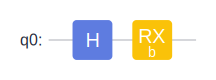

In [15]:
from mindquantum.core.circuit import change_param_name, Circuit
from mindquantum.core.gates import RX, H

u = lambda qubit: Circuit([H.on(0), RX('a').on(qubit)])

u1 = u(0)
u1 = change_param_name(u1, {'a': 'b'})
u1.svg()

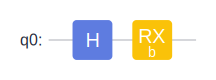

In [16]:
u2 = change_param_name(u, {'a': 'b'})
u2 = u2(0)
u2.svg()

## [mindquantum.core.circuit.UN](https://www.mindspore.cn/mindquantum/docs/en/master/core/circuit/mindquantum.core.circuit.UN.html)

The [UN](https://www.mindspore.cn/mindquantum/docs/en/master/core/circuit/mindquantum.core.circuit.UN.html) module is used to actuate quantum gates on different target qubits and control qubits.

The general format is as follows: `mindquantum.circuit.UN(gate, maps_obj, maps_ctrl=None)`, the parameter `gate` is the gate to be executed, `maps_obj` is the target qubit to be executed, and `maps_Ctrl` is the control qubit (None if there are no control qubits). If each qubit implements the same quantum gate without parameters, `UN(gate, N)` can be used directly, where `N` represents the number of qubits.

Here is a simple example where we apply an [H-gate](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.HGate.html) to each qubit in the [circuit](https://www.mindspore.cn/mindquantum/docs/en/master/core/circuit/mindquantum.core.circuit.Circuit.html) we build:

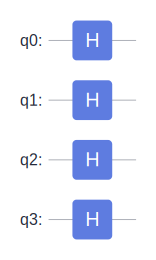

In [17]:
from mindquantum.core.circuit import change_param_name, Circuit, UN
from mindquantum.core.gates import X, H, SWAP

circuit1 = Circuit()
circuit1 += UN(H, 4)  # Apply the H gate to each qubit
circuit1.svg()

In the following example, we add a [CNOT](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.XGate.html) gate to the qubits $q_2$ and $q_0$, $q_3$ and $q_1$ respectively, where $q_2$ is the control bit, $q_0$ is the target bit; $q_3$ is the control bit , $q_1$ is the target bit:

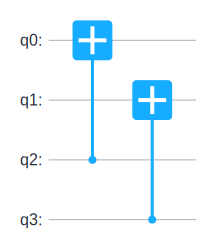

In [18]:
circuit2 = UN(X, maps_obj=[0, 1], maps_ctrl=[2, 3])
circuit2.svg()

For [SWAP](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.SWAPGate.html) gate, the usage is as follows:

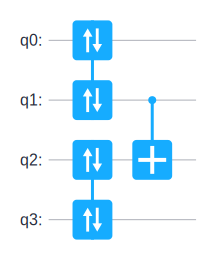

In [19]:
circuit3 = UN(SWAP, maps_obj=[[0, 1], [2, 3]]).x(2, 1)
circuit3.svg()

## [mindquantum.core.circuit.shift](https://www.mindspore.cn/mindquantum/docs/en/master/core/circuit/mindquantum.core.circuit.shift.html)

The [shift](https://www.mindspore.cn/mindquantum/docs/en/master/core/circuit/mindquantum.core.circuit.shift.html) method is used to modify the qubit range of a given circuit, and the parameter is the step size to be shifted. Note that the step size cannot be negative. Moreover, it can only move to the last qubit, and cannot cycle to $q_0$ (the first qubit).

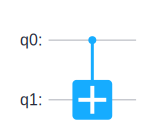

In [20]:
from mindquantum.core.circuit import shift, Circuit
from mindquantum.core.gates import X

circ = Circuit().x(1, 0)
circ.svg()

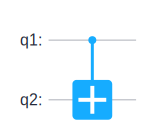

In [21]:
circ = shift(circ, 1)
circ.svg()  # The qubit acting on the circuit changes from q0, q1 to q1, q2

### Case - Iris Classification: Building Encoder

The above examples of higher-order operations show the applicability and convenience of higher-order operations in quantum circuits. What magic will happen if we further combine them to build quantum circuits?

Next we will start with [Classification of irises by quantum neural network](https://mindspore.cn/mindquantum/docs/en/master/case_library/classification_of_iris_by_qnn.html). Build the Encoder part as an example, build the quantum circuit shown in the figure below:

![encoder classification of iris by qnn](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/docs/mindquantum/docs/source_zh_cn/images/encoder_classification_of_iris_by_qnn.png)


In [22]:
from mindquantum.core.circuit import shift, add_prefix, Circuit, UN
from mindquantum.core.gates import RZ, X, H

template = Circuit([X.on(1, 0), RZ('alpha').on(1), X.on(1, 0)])
encoder = UN(H, 4) + (RZ(f'{i}_alpha').on(i) for i in range(4)) + sum(add_prefix(shift(template, i), f'{i+4}') for i in range(3))
encoder.summary()

                                    Circuit Summary                                     
╭──────────────────────┬───────────────────────────────────────────────────────────────╮
│ Info                 │ value                                                         │
├──────────────────────┼───────────────────────────────────────────────────────────────┤
│ Number of qubit      │ 4                                                             │
├──────────────────────┼───────────────────────────────────────────────────────────────┤
│ Total number of gate │ 17                                                            │
│ Barrier              │ 0                                                             │
│ Noise Channel        │ 0                                                             │
│ Measurement          │ 0                                                             │
├──────────────────────┼───────────────────────────────────────────────────────────────┤
│ Parameter gate       │ 7                                                             │
│ 7 ansatz parameters  │ 0_alpha, 1_alpha, 2_alpha, 3_alpha, 4_alpha, 5_alpha, 6_alpha │
╰──────────────────────┴───────────────────────────────────────────────────────────────╯

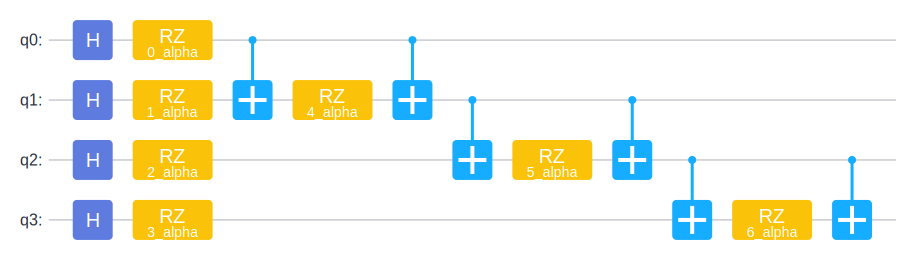

In [23]:
encoder.svg()

In the above code, we use the UN module to apply the parameter-free H gate to the target qubits $q_0$~$q_3$, and then apply the RZ(i_alpha) gate to the i-th qubit.
Next, it is observed that there are three identical modules in the circuit, and they are all composed of a controlled X gate, a RZ gate and a controlled X gate. Therefore, we construct the corresponding template template, which is controlled by $q_0$, an X gate acting on $q_1$, an RZ gate acting on $q_1$, and an X gate controlled by $q_0$ acting on $q_1$ are formed. Then we use shift(template, i) to change the qubit range that the template acts on, and build three modules with the same structure but the qubit range differs by 1. The qubit ranges involved are $q_0$ and $q_1$, $q_1$ and $q_2$, $q_2$ and $q_3$.
Finally, we use the add_prefix method to prefix the parameter names of all parameter quantum gates constructed by shift with a number.

So far, through these advanced operations of quantum circuit provided by MindSpore Quantum, we have built the required Encoder with only two lines of code!

In [24]:
from mindquantum.utils.show_info import InfoTable

InfoTable('mindquantum', 'scipy', 'numpy')

Software,Version
mindquantum,0.9.11
scipy,1.10.1
numpy,1.24.4
System,Info
Python,3.8.17
OS,Linux x86_64
Memory,16.62 GB
CPU Max Thread,16
Date,Tue Jan 2 14:38:22 2024
